## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


Import libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [4]:
df = pd.read_csv('assets/real_estate.csv', sep=';')
df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the most expensive home in the dataset? (★☆☆)

In [24]:
print("The most expensie home in the dataset is: " + str(df['price'].max()))  

The most expensie home in the dataset is: 8500000


#### What is cheapest home in the dataset? (★☆☆)

In [25]:
df = df[df['price']>0]
print("The cheapest home in the dataset is: " + str(df["price"].min()))


The cheapest home in the dataset is: 600


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [27]:
print("Biggest home in the dataset is: " + str(df["surface"].max()))

Biggest home in the dataset is: 249000.0


In [28]:
print("Smallest home in the dataset is: " + str(df["surface"].min())) 

Smallest home in the dataset is: 15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [30]:
level_5_unique = df['level5'].unique()
print("The dataset contains " + str(len(level_5_unique)) + " populations")

The dataset contains 168 populations


#### Does the dataset contain NAs? (★☆☆)


In [18]:
df.isna().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      721
url_inmueble            0
rooms                 322
bathrooms             295
surface                 0
price                   0
date                    0
description           129
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6237
level5                  0
level6              13408
level7               2024
level8               7749
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             14085
customZone          14085
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [29]:
#Acá no usamos dropna porque hay muchos missing y la función dropna borra las rows en las que hay missing, en este caso nos quedamos sin datos casi.
#Lo que sí se puede hacer es reemplazar los na por otros valores, por ejemplo:
# df['level6'].fillna("sin-determinar", inplace=True) #Reemplaza los NA en "level6" con "sin-determinar"
# df['rooms'].fillna(0, inplace=True) #Reemplaza los NA en "rooms" con 0


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [31]:
df_arroyo = df[df['level5'] == "Arroyomolinos (Madrid)"] 
prices_arroyo_sin_0 = df_arroyo[df_arroyo['price'] > 0] 
print("Mean of Arroyomolinos prices is: " + str(prices_arroyo_sin_0['price'].mean()))

Mean of Arroyomolinos prices is: 298905.1777777778


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

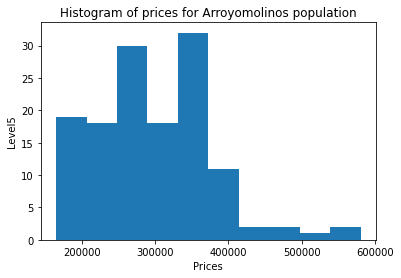


    La mayoría de las casas de Arroyomolinos se concentran en el entorno de los 250.000 y 350.000 dólares.
    La distribución parecería estar sesgada a la izquierda.
    


In [38]:
df_arroyo = df[df['level5'] == "Arroyomolinos (Madrid)"] 
prices_arroyo_sin_0 = df_arroyo[df_arroyo['price'] > 0] 
plt.hist(prices_arroyo_sin_0['price']) #Lo ploteo
plt.xlabel('Prices')
plt.ylabel('Level5')
plt.title('Histogram of prices for Arroyomolinos population')
plt.show()
com = \
    """
    La mayoría de las casas de Arroyomolinos se concentran en el entorno de los 250.000 y 350.000 dólares.
    La distribución parecería estar sesgada a la izquierda.
    """
print(com)



Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" 

In [39]:
sbelt = df[(df['level5'] == "Fuenlabrada") | (df['level5'] == "Leganés") | (df['level5'] == "Getafe") | (df['level5'] == "Alcorcón")]
sbelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 15325
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        895 non-null    int64  
 1   id_realEstates    895 non-null    int64  
 2   isNew             895 non-null    bool   
 3   realEstate_name   895 non-null    object 
 4   phone_realEstate  843 non-null    float64
 5   url_inmueble      895 non-null    object 
 6   rooms             890 non-null    float64
 7   bathrooms         885 non-null    float64
 8   surface           775 non-null    float64
 9   price             895 non-null    int64  
 10  date              895 non-null    object 
 11  description       890 non-null    object 
 12  address           895 non-null    object 
 13  country           895 non-null    object 
 14  level1            895 non-null    object 
 15  level2            895 non-null    object 
 16  level3            895 non-null    object 


#### Make a bar plot of the median of prices (★★★) 

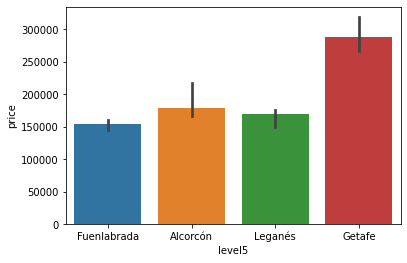

In [40]:
from statistics import median
sbelt = df[(df['level5'] == "Fuenlabrada") | (df['level5'] == "Leganés") | (df['level5'] == "Getafe") | (df['level5'] == "Alcorcón")]
sb.barplot(x = sbelt['level5'], y = sbelt['price'], estimator = median)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [41]:
variables = sbelt[['price', 'rooms', 'surface', 'bathrooms']]
print("Mean:")
print(variables.mean()) 
print("Variance:")
print(variables.var())

Mean:
price        226085.691620
rooms             3.023596
surface         111.298065
bathrooms         1.627119
dtype: float64
Variance:
price        1.444463e+10
rooms        7.204775e-01
surface      4.275920e+03
bathrooms    5.757343e-01
dtype: float64


#### What is the most expensive home of each population? (★★☆) 

In [5]:
sbelt.groupby('level5')['price'].agg('max')

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

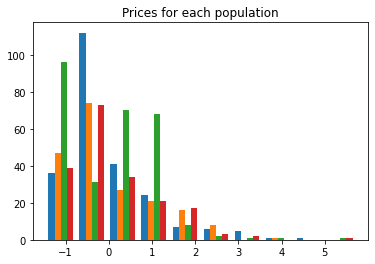

In [47]:
sbelt_fuen = sbelt[(sbelt['level5'] == "Fuenlabrada")]
sbelt_leg = sbelt[(sbelt['level5'] == "Leganés")]
sbelt_ge = sbelt[(sbelt['level5'] == "Getafe")]
sbelt_alc = sbelt[(sbelt['level5'] == "Alcorcón")] 

nfuen=(sbelt_fuen['price']-np.nanmean(sbelt_fuen['price']))/np.nanstd(sbelt_fuen['price'])
nleg=(sbelt_leg['price']-np.nanmean(sbelt_leg['price']))/np.nanstd(sbelt_leg['price'])
nge=(sbelt_ge['price']-np.nanmean(sbelt_ge['price']))/np.nanstd(sbelt_ge['price'])
nalc=(sbelt_alc['price']-np.nanmean(sbelt_alc['price']))/np.nanstd(sbelt_alc['price'])

plt.hist([nfuen, nleg, nge, nalc])
plt.title("Prices for each population")
plt.show()

#Couldn't figure out how to add color labels

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [42]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [45]:
from ipyleaflet import Map, GeoJSON, GeoData
import geopandas

zone = sbelt['level5'].unique().tolist()
colors = np.array(['#458B74','#E3CF57','#FF9912','#BF3EFF'])

dt = sbelt.copy()

dt['latitude'] = dt['latitude'].str.replace(',' , '.').astype(float)
dt['longitude'] = dt['longitude'].str.replace(',' , '.').astype(float)

for i, x in enumerate(zone):
    z=dt.loc[dt['level5']==x]

    gdf = geopandas.GeoDataFrame(z, geometry=geopandas.points_from_xy(z.longitude, z.latitude))
    
    geo_data = GeoData(geo_dataframe = gdf,
        style={'color': 'black', 'radius':8, 'fillColor': colors[i], 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
        hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
        point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
        name = 'Release')
    map.add_layer(geo_data)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [50]:
print("Price per square meter in Getafe is: " + str(np.sum(sbelt_ge['price'])/np.sum(sbelt_ge['surface']))) 
print("Price per square meter in Alcorcón is: " + str(np.sum(sbelt_alc['price'])/np.sum(sbelt_alc['surface'])))
print("Prices are a little bit higher in Getafe")

Price per square meter in Getafe is: 2660.588632351414
Price per square meter in Alcorcón is: 2385.717404355182
Prices are a little bit higher in Getafe


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [54]:
valdeygala = df[(df['level5'] == "Valdemorillo") | (df['level5'] == "Galapagar")]
print(valdeygala.groupby('level5')['price'].mean())
print("Average of prices is not the same, they are higher in Valdemorillo")

level5
Galapagar       360063.202381
Valdemorillo    363860.293103
Name: price, dtype: float64
Average of prices is not the same, they are higher in Valdemorillo


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [56]:
df['pricem2'] = df['price'] / df['surface']
valdeygala = df[(df['level5'] == "Valdemorillo") | (df['level5'] == "Galapagar")]
print(valdeygala.groupby('level5')['pricem2'].mean())
print("Average is not the same. Actually, the difference becomes bigger.")

level5
Galapagar       1606.324030
Valdemorillo    1317.950211
Name: pricem2, dtype: float64
Average is not the same. Actually, the difference becomes bigger.


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

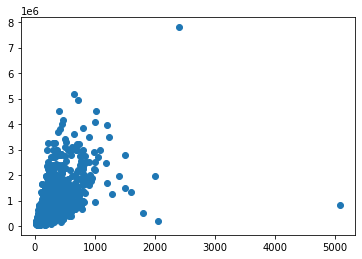

There seems to be a positive correlation between price and surface.


In [70]:
x = df['surface'][:4000]
y = df['price'][:4000]

plt.scatter(x, y)
plt.show()

print("There seems to be a positive correlation between price and surface.")

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

Text(0.5, 1.0, 'Alcorcón')

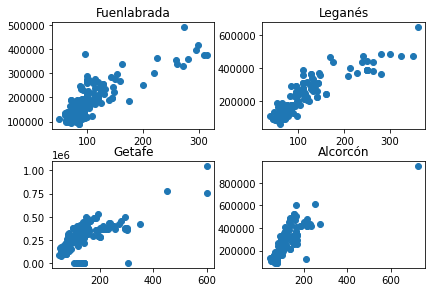

In [22]:
sbelt_fuen = sbelt[(sbelt['level5'] == "Fuenlabrada")]
sbelt_leg = sbelt[(sbelt['level5'] == "Leganés")]
sbelt_ge = sbelt[(sbelt['level5'] == "Getafe")]
sbelt_alc = sbelt[(sbelt['level5'] == "Alcorcón")] 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
s1 = sbelt_fuen['surface']
p1 = sbelt_fuen['price']
s2 = sbelt_leg['surface']
p2 = sbelt_leg['price']
s3 = sbelt_ge['surface']
p3 = sbelt_ge['price']
s4 = sbelt_alc['surface']
p4 = sbelt_alc['price']

ax1.scatter(s1, p1)
ax2.scatter(s2, p2)
ax3.scatter(s3, p3)
ax4.scatter(s4, p4)

ax1.set_title('Fuenlabrada')
ax2.set_title('Leganés')
ax3.set_title('Getafe')
ax4.set_title('Alcorcón')

#### How many  real estate agencies the dataset contains? (★★☆) 

In [58]:
realestategroup = df.groupby(['id_realEstates'])
print("The dataset contains " + str(len(realestategroup)) + " real estate agencies.")

The dataset contains 14160 real estate agencies.


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [69]:
print("Population with most houses is Madrid Capital.")
dfbypopulation = df.groupby(['level5'])
dfbypopulation.count()


Population with most houses is Madrid Capital.


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pricem2
level5,,,,,,,,,,,,,,,,,,,,,
Madrid Capital,6632,6632,6632,6628,6260,6632,6461,6483,6228,6632,...,6632,6632,6632,6632,6632,6632,6632,0,0,6228
Ajalvir,17,17,17,17,16,17,17,17,16,17,...,17,17,17,17,17,17,17,0,0,16
Alcalá de Henares,525,525,525,525,514,525,514,517,499,525,...,525,525,525,525,525,525,525,0,0,499
Alcobendas,258,258,258,258,255,258,249,253,255,258,...,258,258,258,258,258,258,258,0,0,255
Alcorcón,190,190,190,190,174,190,188,186,173,190,...,190,190,190,190,190,190,190,0,0,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villar del Olmo,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
Villarejo de Salvanés,19,19,19,19,19,19,16,16,17,19,...,19,19,19,19,19,19,19,0,0,17
Villaviciosa de Odón,166,166,166,166,163,166,165,166,148,166,...,166,166,166,166,166,166,166,0,0,148
